In [3]:
%pip install matplotlib\

     |████████████████████████████████| 11.6 MB 125 kB/s eta 0:00:01    |█                               | 368 kB 77 kB/s eta 0:02:26     |████▉                           | 1.8 MB 125 kB/s eta 0:01:19     |████████████████████▏           | 7.3 MB 119 kB/s eta 0:00:36     |█████████████████████████████▌  | 10.7 MB 142 kB/s eta 0:00:07
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 14.5 MB 123 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 125 kB/s eta 0:00:01     |███████▊                        | 276 kB 123 kB/s eta 0:00:07
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install numpy==1.19.4

Note: you may need to restart the kernel to use updated packages.


In [1]:
#对比几种初始化方法
import numpy as np
np.__version__
import matplotlib.pyplot as plt

In [10]:

#初始化为0
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                b1 -- bias vector of shape (layers_dims[1], 1)
                ...
                WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                bL -- bias vector of shape (layers_dims[L], 1)
    """
    parameters = {}
    L = len(layers_dims)  # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

#随机初始化
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)  # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)  # integer representing the number of layers
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1])*0.01
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

#xavier initialization
def initialize_parameters_xavier(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)  # integer representing the number of layers
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(1 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

    #He initialization
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)  # integer representing the number of layers

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

def relu(Z):
    """
    :param Z: Output of the linear layer
    :return:
    A: output of activation
    """
    A = np.maximum(0,Z)
    return A


def initialize_parameters(layer_dims):
    """
    :param layer_dims: list,每一层单元的个数（维度）
    :return:dictionary,存储参数w1,w2,...,wL,b1,...,bL
    """
    np.random.seed(3)
    L = len(layer_dims)#the number of layers in the network
    parameters = {}
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2 / layer_dims[l - 1])
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

def forward_propagation(initialization="he"):
    data = np.random.randn(1000, 100000)
    layers_dims = [1000, 800, 500, 300, 200, 100, 10]
    num_layers = len(layers_dims)
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "xavier":
        parameters = initialize_parameters_xavier(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
#     print("parameters:", parameters)
    A = data
    for l in range(1, num_layers):
        A_pre = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        
        z = np.dot(W, A_pre) + b #计算z = wx + b
        # A = np.tanh(z) #relu activation function
        A = relu(z)
        plt.subplot(2,3,l)
        plt.hist(A.flatten(),facecolor='g')
        plt.xlim([-1,1])
        plt.yticks([])
    plt.show()

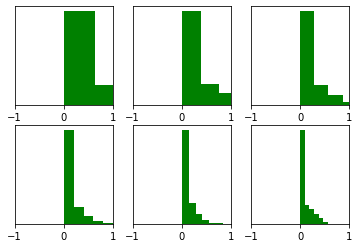

In [11]:
forward_propagation(initialization="xavier")

In [15]:
w = np.random.randn(2,3)
w

array([[-1.88674765,  1.34177204, -1.19474712],
       [ 1.14658764, -0.26205956,  0.60357978]])

In [18]:
x = np.random.randn(3, 2)
x

array([[0.55841958, 0.77063977],
       [1.81325077, 0.64012744],
       [1.50241658, 0.24468444]])

In [19]:
np.dot(w, x)

array([[-0.41563552, -0.8874337 ],
       [ 1.07192555,  0.8635411 ]])